# Лабораторная работа 4
## Линейные модели, SVM и деревья решений.
Цель лабораторной работы: изучение линейных моделей, SVM и деревьев решений.
Выберите набор данных (датасет) для решения задачи классификации или регрессии.
В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
С использованием метода train_test_split разделите выборку на обучающую и тестовую.
Обучите следующие модели:
одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
SVM;
дерево решений.
Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
Постройте график, показывающий важность признаков в дереве решений.
Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

target_col='Spectral Class'

%matplotlib inline 
sns.set(style="ticks")

In [4]:
data = pd.read_csv('./stars.csv')
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [5]:
data.shape

(240, 7)

## Удаляем пустые значения и кодируем категориальные признаки

In [6]:
data = data.dropna(axis=1, how='any')
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [7]:
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    if null_count == 0:
        column_type = data[col].dtype
        print('{} - {} - {}'.format(col, column_type, null_count))

Temperature (K) - int64 - 0
Luminosity(L/Lo) - float64 - 0
Radius(R/Ro) - float64 - 0
Absolute magnitude(Mv) - float64 - 0
Star type - int64 - 0
Star color - object - 0
Spectral Class - object - 0


Категориальные признаки

In [8]:
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

Star color
Spectral Class


In [9]:
le1 = LabelEncoder()
data['Star color'] = le1.fit_transform(data['Star color']);

In [10]:
le2 = LabelEncoder()
data['Spectral Class'] = le2.fit_transform(data['Spectral Class']);

In [11]:
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

## Разделение выборки на обучающую и тестовую


In [12]:
X = data.drop(target_col, axis=1)
Y = data[target_col]

In [13]:
X

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,3068,0.002400,0.1700,16.12,0,10
1,3042,0.000500,0.1542,16.60,0,10
2,2600,0.000300,0.1020,18.70,0,10
3,2800,0.000200,0.1600,16.65,0,10
4,1939,0.000138,0.1030,20.06,0,10
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0
236,30839,834042.000000,1194.0000,-10.63,5,0
237,8829,537493.000000,1423.0000,-10.73,5,11
238,9235,404940.000000,1112.0000,-11.23,5,11


In [15]:
Y

0      5
1      5
2      5
3      5
4      5
      ..
235    6
236    6
237    0
238    0
239    6
Name: Spectral Class, Length: 240, dtype: int64

In [16]:
pd.DataFrame(X, columns=X.columns).describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000,7.250000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394,4.926659
min,1939.000000,0.000080,0.008400,-11.920000,0.000000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000,2.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000,10.000000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000,10.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000,18.000000


Разделим выборку на обучающую и тестовую:

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
print('{}, {}'.format(X_train.shape, X_test.shape))
print('{}, {}'.format(Y_train.shape, Y_test.shape))

(180, 6), (60, 6)
(180,), (60,)


## Обучение моделей

### Линейная модель

In [18]:
SGD = SGDClassifier(max_iter=10000)
SGD.fit(X_train, Y_train)

SGDClassifier(max_iter=10000)

In [16]:
f1_score(Y_test, SGD.predict(X_test), average='micro')
precision_score(Y_test, SGD.predict(X_test), average='micro')

0.08333333333333333

### SVM

In [19]:
SVC = SVC(kernel='rbf')
SVC.fit(X_train, Y_train)

SVC()

In [20]:
f1_score(Y_test, SVC.predict(X_test), average='micro')
precision_score(Y_test, SVC.predict(X_test), average='micro')

0.5166666666666667

### Дерево решений

In [21]:
DT = DecisionTreeClassifier(random_state=1)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [22]:
f1_score(Y_test, DT.predict(X_test), average='micro')
precision_score(Y_test, DT.predict(X_test), average='micro')

0.8333333333333334

Можно сделать вывод, что дерево решений дает лучший результат

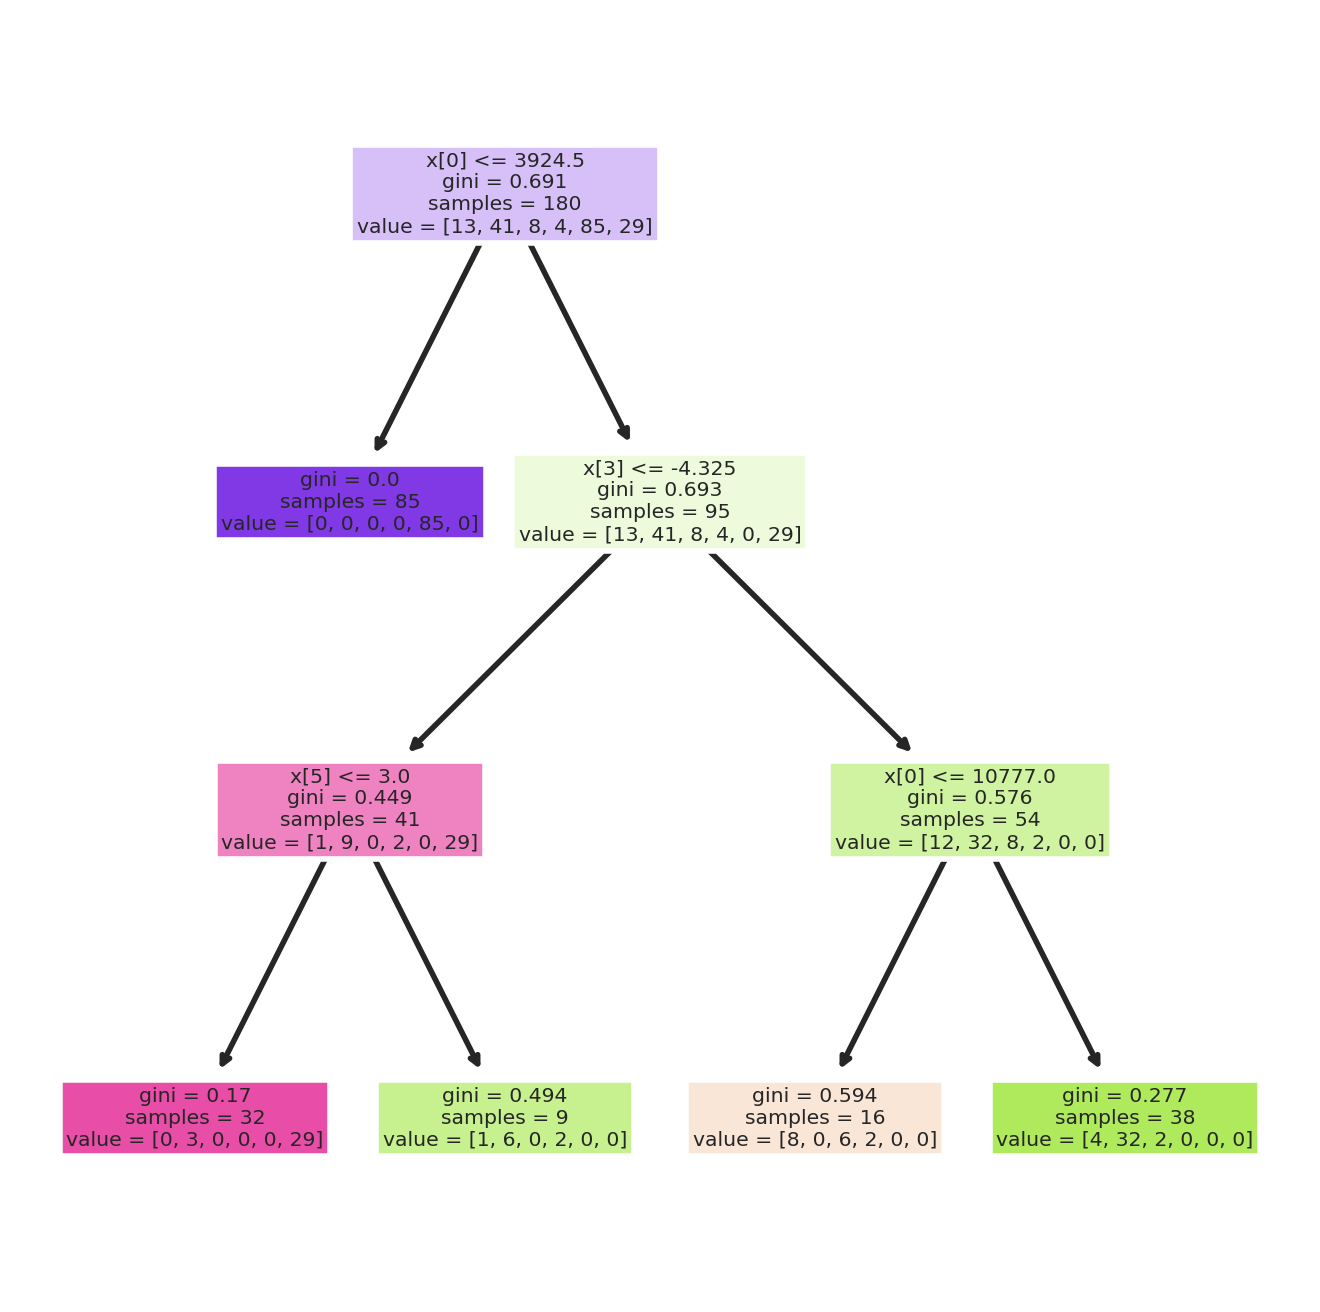

In [23]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)
clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0)
clf.fit(X_train, Y_train)
tree.plot_tree(clf, filled = True);